In [1]:
from math import *
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

5. Markowitz Portfolio Selection

(i) Importing the prices and defining useful variables

In [2]:
# Importing the adjusted prices
prices = pd.read_csv(r'AdjustedPrices.csv')
prices = prices.set_index('Date', drop = True)
PRICES = prices.values

In [3]:
# Computing the returns
Ret = prices / prices.shift(1) - 1
Ret = Ret.drop(labels=Ret.index[0], axis=0)
RET = Ret.values

In [4]:
# Average return
p = Ret.mean()
P = p.values

In [5]:
# Sample covariance matrix
Cov = pd.DataFrame(Ret.iloc[0] - p) @ pd.DataFrame(Ret.iloc[0] - p).T
for i in range(1, len(Ret.index)):
    Cov += pd.DataFrame(Ret.iloc[i] - p) @ pd.DataFrame(Ret.iloc[i] - p).T
Cov = Cov / (len(Ret.index) - 1)
COV = Cov.values

(iii) Portfolio Selection

In [6]:
B   = 1
one = np.array([1 for i in range(len(Ret.columns))])

R_range = np.logspace(-6, 0, num=100)

Result = []
X      = []
for R in R_range:
    # Construct the problem.
    x_ = cp.Variable(len(Ret.columns))
    objective = cp.Maximize(np.transpose(P) @ x_)
    constraints = [x_ @ COV @ x_ <= R, (np.transpose(one) @ x_) <= B, x_ >= 0]
    prob = cp.Problem(objective, constraints)
    # Solve
    result    = prob.solve()
    Result += [result]
    X      += [x_.value]

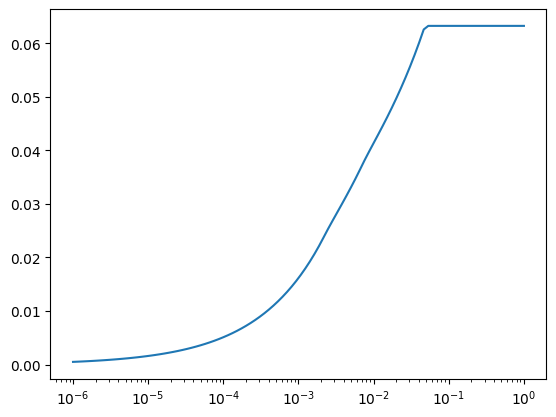

In [7]:
plt.xscale("log")
plt.plot(R_range, Result)

First of all we can observe that if we allow more "Variance & Covariance" we will also get a better portfolio return. We see the expected return growing with R, more or less exponentially, at first when R is between $10^{-6}$ and a bit less than $10^{-1}$. After that the return stay constant.

(iv) Specific portfolio

In [9]:
Positions = pd.DataFrame(0, index=Ret.columns, columns=[1e-6, 1e-4, 1e-2, 1e0])
for R_ in Positions.columns:
    ind = 0
    for i in range(len(R_range)):
        if R_range[i] == R_:
            ind = i
    Positions.loc[:,R_] = pd.Series(X[ind], index=Ret.columns)

print(Positions)

           0.000001      0.000100      0.010000      1.000000
AAPL   8.673872e-08  1.554109e-09  6.361654e-09  1.219663e-10
MSFT   9.412502e-08  1.680397e-09  5.068134e-09  7.812153e-11
AMZN   2.211892e-08  4.273241e-10  2.077440e-09  4.590511e-11
NVDA   1.574773e-03  1.574462e-02  8.539710e-02  2.250862e-10
TSLA   1.481081e-03  1.481084e-02  3.563916e-01  1.000000e+00
BRK-B  3.638037e-08  7.016190e-10  2.814396e-09  4.373051e-11
GOOG   3.922205e-08  7.369042e-10  2.836913e-09  5.217135e-11
XOM    1.869287e-05  1.970747e-04  4.276014e-09  6.236433e-11
UNH    1.867678e-07  2.952422e-09  4.998327e-09  6.523303e-11
JPM    5.325501e-08  8.991565e-10  2.985315e-09  4.697670e-11
JNJ    2.272311e-08  4.655075e-10  2.560913e-09  3.764519e-11
META   5.983323e-08  9.638741e-10  2.395935e-09  4.402736e-11
V      7.294782e-08  1.233448e-09  3.501216e-09  5.442318e-11
PG     7.644377e-03  7.643824e-02  4.702400e-09  5.016765e-11
HD     8.016134e-08  1.324421e-09  3.517937e-09  5.391917e-11
MA     1

We observe that the portfolio is less and less diversified with R increasing. At first for $R=10^{-6}$, we can see a lot of positions around $10^{-3}$, and the majority around $10^{-7}\ or\ 10^{-8}$ (which we can assume are negligeable). Then the difference between the "high" position and the low one will increase and the number of "non-negligeable" positions is globally decreasing. Leading to at the end, for $R=10^0$, only really low position (negligeable one) and a single big one, equal to $1$, for TESLA.